A short demo on using ML to analyze Kaggle sourced income related data.
https://www.kaggle.com/datasets/wenruliu/adult-income-dataset

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

df =pd.read_csv("income.csv")

In [2]:
#df

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [4]:
# df.education.value_counts()
# df.workclass.value_counts()
df.occupation.value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [5]:
# A means of encoding 'occupation' category values for each row
# This allows us to create Boolean varaibles (better for regressions) rather than ordinal variables
pd.get_dummies(df.occupation).add_prefix('occupation_')

,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
48838,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
48839,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
48840,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
df = pd.concat( [df.drop('occupation', axis=1), pd.get_dummies(df.occupation).add_prefix('occupation_')], axis=1 )
df = pd.concat( [df.drop('workclass', axis=1), pd.get_dummies(df.workclass).add_prefix('workclass_')], axis=1 )
df = df.drop('education', axis=1)
df = df.drop('fnlwgt', axis=1)
df = pd.concat( [df.drop('marital-status', axis=1), pd.get_dummies(df['marital-status']).add_prefix('marital-status_')], axis=1 )
df = pd.concat( [df.drop('relationship', axis=1), pd.get_dummies(df.relationship).add_prefix('relationship_')], axis=1 )
df = pd.concat( [df.drop('race', axis=1), pd.get_dummies(df.race).add_prefix('race_')], axis=1 )
df = pd.concat( [df.drop('native-country', axis=1), pd.get_dummies(df['native-country']).add_prefix('native-country_')], axis=1 )


In [7]:
#df.gender.value_counts()
df['gender'] = df['gender'].apply(lambda x: 1 if x == 'Male' else 0)
df['income'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)


In [8]:
df

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,7,1,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,38,9,1,0,0,50,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,28,12,1,0,0,40,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,44,10,1,7688,0,40,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,18,10,0,0,0,30,0,True,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,12,0,0,0,38,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
48838,40,9,1,0,0,40,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False
48839,58,9,0,0,0,40,0,False,True,False,...,False,False,False,False,False,False,False,True,False,False
48840,22,9,1,0,0,20,0,False,True,False,...,False,False,False,False,False,False,False,True,False,False


<Axes: >

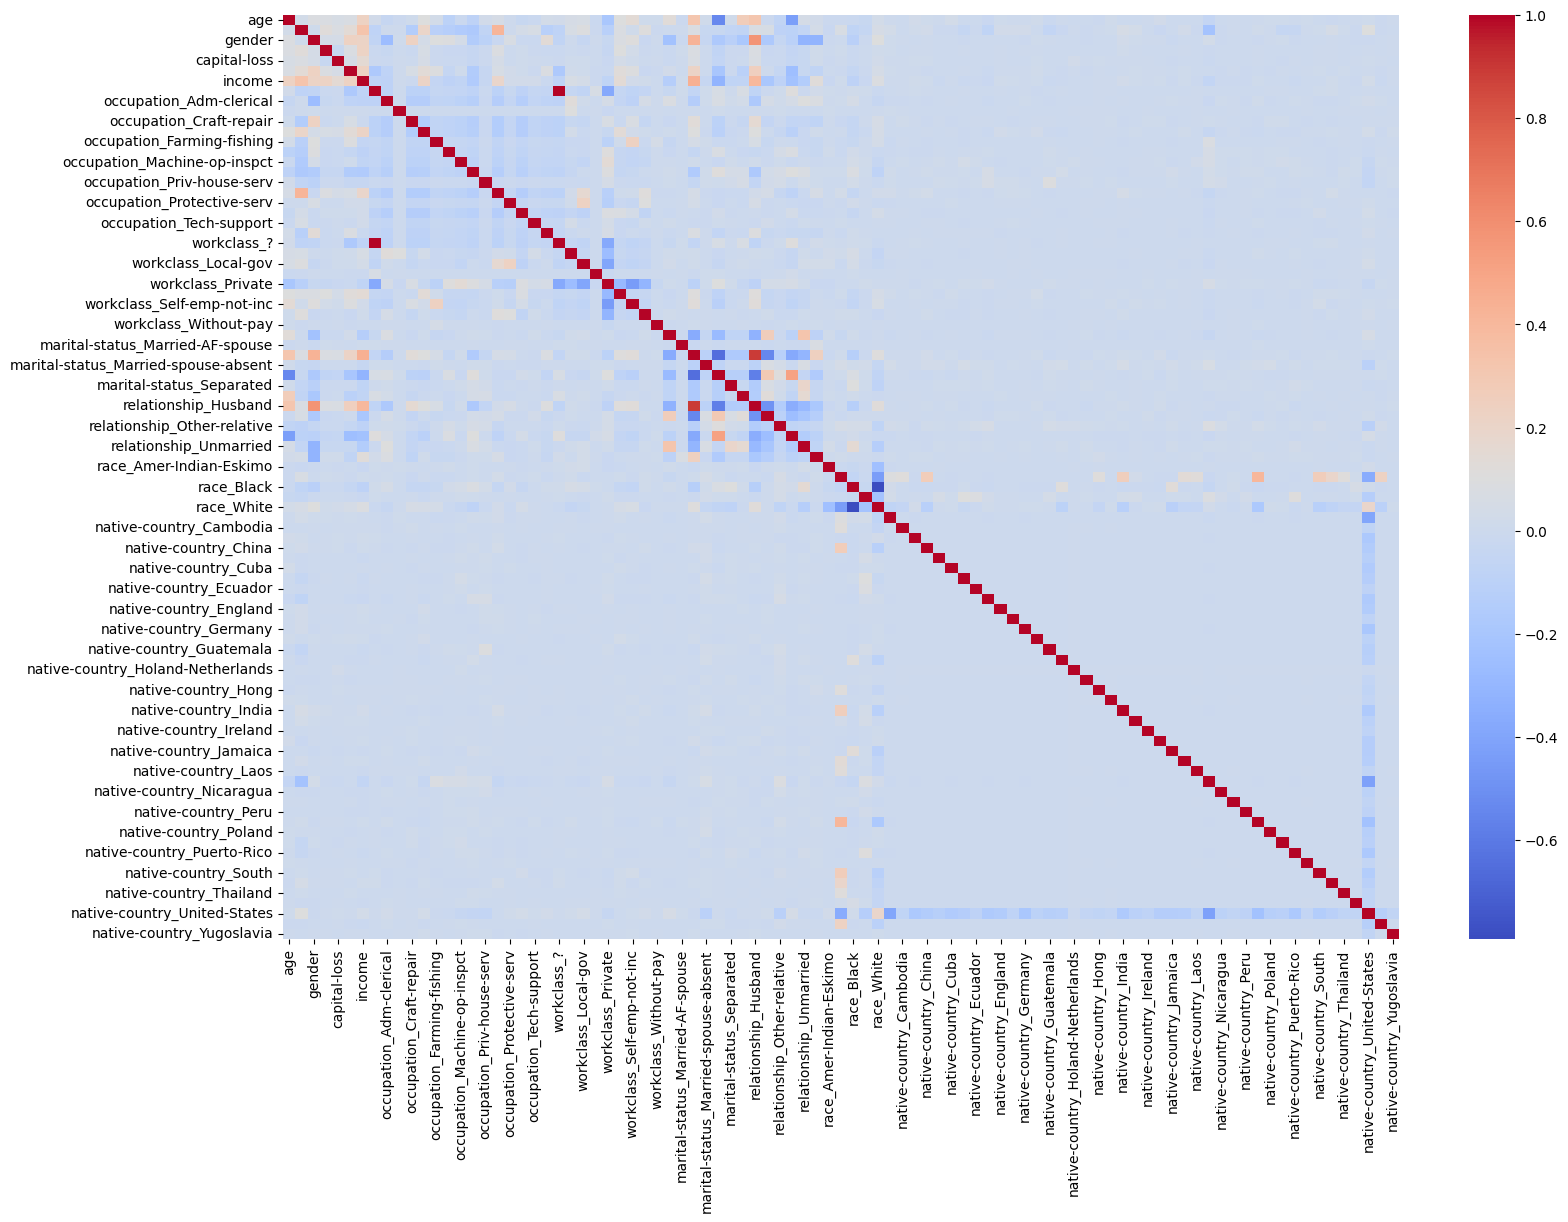

In [9]:
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')

In [10]:
# We wish to see which variables are strongly correlated with income
corr = df.corr()['income'].abs()
sorted_corr = corr.sort_values()

# Arbitrarily dropping bottom 80% of correlations (in absolute terms) for visualization purposes
threshold = int(0.8 * len(df.columns))
cols_to_drop = sorted_corr.iloc[:threshold].index
df_dropped = df.drop(cols_to_drop, axis=1)

In [11]:
df_dropped
# We reduced from 91 columns to 19

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_Exec-managerial,occupation_Other-service,occupation_Prof-specialty,workclass_Self-emp-inc,marital-status_Divorced,marital-status_Married-civ-spouse,marital-status_Never-married,relationship_Husband,relationship_Not-in-family,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,25,7,1,0,0,40,0,False,False,False,False,False,False,True,False,False,True,False,False
1,38,9,1,0,0,50,0,False,False,False,False,False,True,False,True,False,False,False,False
2,28,12,1,0,0,40,1,False,False,False,False,False,True,False,True,False,False,False,False
3,44,10,1,7688,0,40,1,False,False,False,False,False,True,False,True,False,False,False,False
4,18,10,0,0,0,30,0,False,False,False,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,12,0,0,0,38,0,False,False,False,False,False,True,False,False,False,False,False,True
48838,40,9,1,0,0,40,1,False,False,False,False,False,True,False,True,False,False,False,False
48839,58,9,0,0,0,40,0,False,False,False,False,False,False,False,False,False,False,True,False
48840,22,9,1,0,0,20,0,False,False,False,False,False,False,True,False,False,True,False,False


<Axes: >

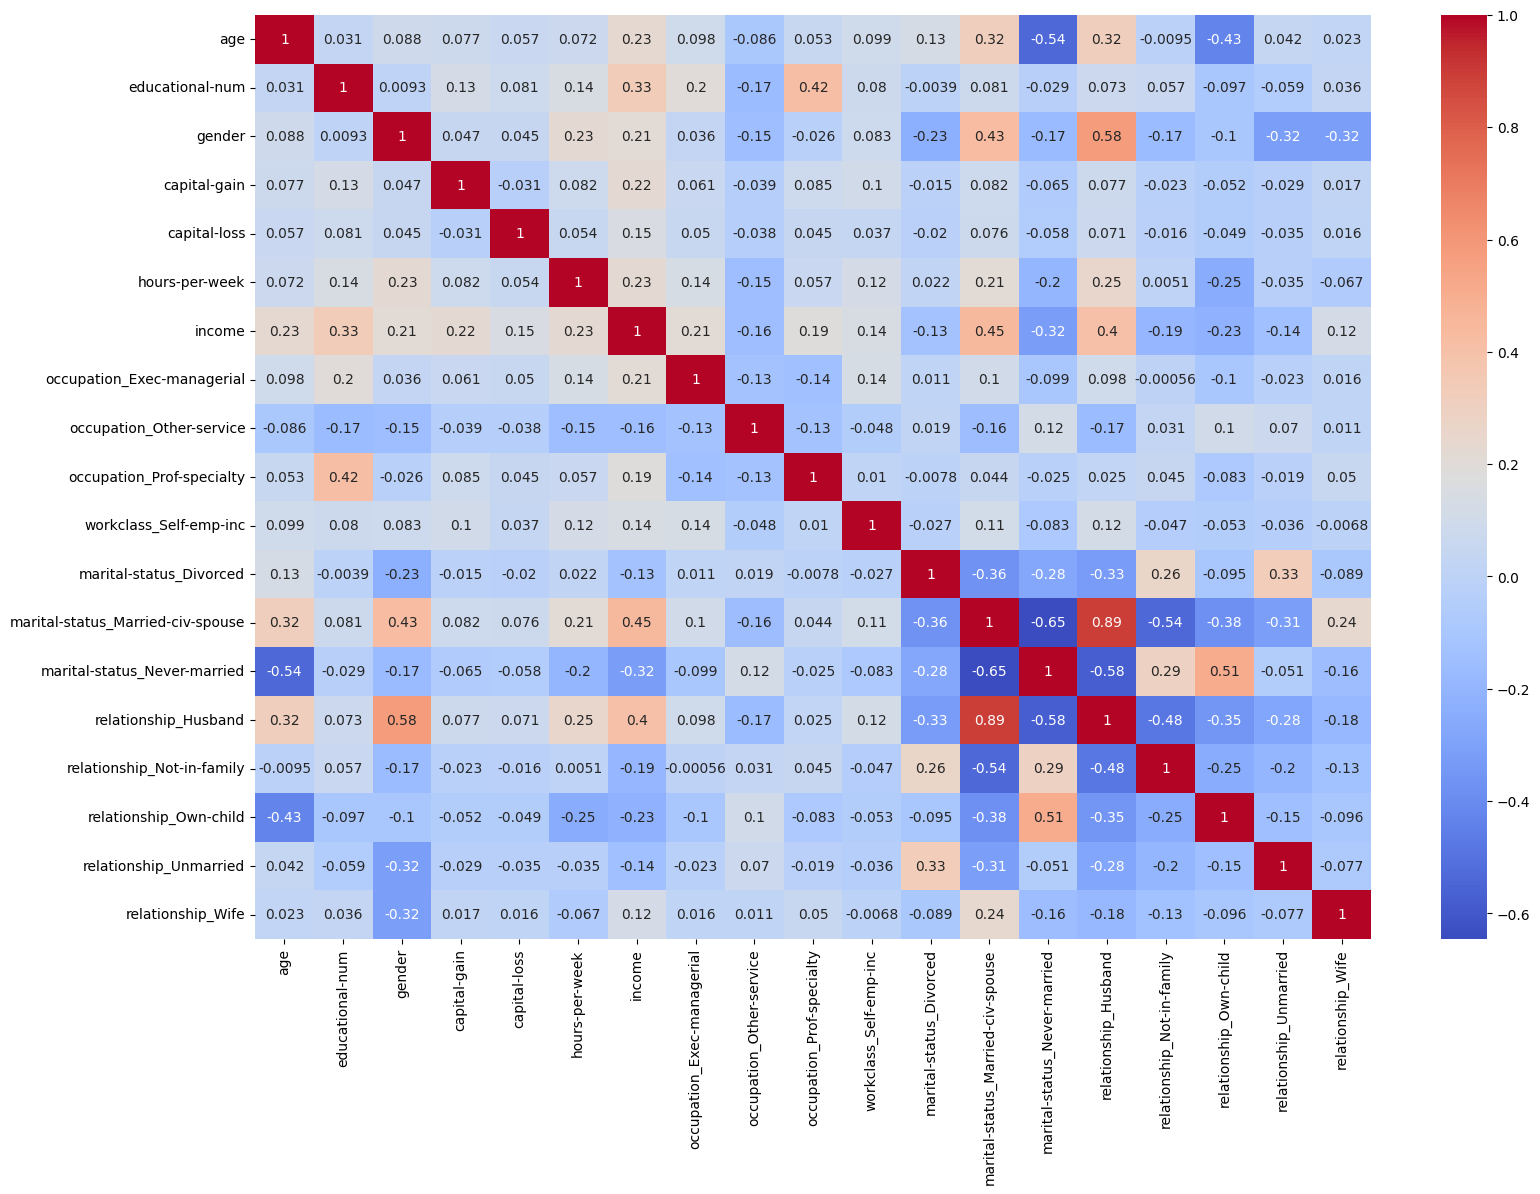

In [12]:
plt.figure(figsize=(18,12))
sns.heatmap(df_dropped.corr(), annot=True, cmap='coolwarm')

We will train a Random Forest Classifier. Our transformed data is full of Boolean variables.

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

test_size = 0.2
train_df, test_df = train_test_split(df, test_size=test_size)

In [14]:
train_X = train_df.drop('income', axis=1)
train_Y = train_df['income']

test_X = test_df.drop('income', axis=1)
test_Y = test_df['income']

In [15]:
forest = RandomForestClassifier()
forest.fit(train_X, train_Y)

RandomForestClassifier()

In [16]:
forest.score(test_X, test_Y)

0.8417442931722796

In [17]:
importances = dict( zip(forest.feature_names_in_, forest.feature_importances_) )
importances = {k : v for k, v in sorted(importances.items(), key=lambda x: x[1], reverse=True)}
importances

{'age': 0.22590732224903604,
 'educational-num': 0.1270130061179936,
 'hours-per-week': 0.11445803670845027,
 'capital-gain': 0.11309884946506886,
 'marital-status_Married-civ-spouse': 0.07432795807380616,
 'relationship_Husband': 0.04397302761529714,
 'capital-loss': 0.03902576606300483,
 'marital-status_Never-married': 0.026318655232462806,
 'occupation_Exec-managerial': 0.02069457817658063,
 'occupation_Prof-specialty': 0.017049058729726122,
 'gender': 0.013910435271491583,
 'relationship_Not-in-family': 0.011153548970063534,
 'relationship_Wife': 0.010056506452331457,
 'workclass_Private': 0.009164004349272887,
 'relationship_Own-child': 0.008319531063401385,
 'workclass_Self-emp-not-inc': 0.007960955004949359,
 'occupation_Other-service': 0.007640021315908115,
 'relationship_Unmarried': 0.007280559670393755,
 'marital-status_Divorced': 0.006975977134700659,
 'workclass_Self-emp-inc': 0.006634149623700664,
 'race_White': 0.006262194381866557,
 'occupation_Craft-repair': 0.006094479

In [18]:
param_grid = {
    'n_estimators': [50, 100, 250],
    'max_depth': [5, 10, 30, None],
    'min_samples_split': [2,4],
    'max_features': ['sqrt', 'log2']
}
grid_search = GridSearchCV(estimator=RandomForestClassifier(),
                           param_grid=param_grid, verbose=10)


In [ ]:
grid_search.fit(train_X, train_Y)

In [20]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=30, min_samples_split=4, n_estimators=250)

In [21]:
forest = grid_search.best_estimator_
forest.score(test_X, test_Y)

0.8588391851776026

In [22]:
importances = dict( zip(forest.feature_names_in_, forest.feature_importances_) )
importances = {k : v for k, v in sorted(importances.items(), key=lambda x: x[1], reverse=True)}
importances

{'age': 0.15167203694392728,
 'educational-num': 0.13644382666963684,
 'capital-gain': 0.1331376657949135,
 'hours-per-week': 0.09258039126925387,
 'marital-status_Married-civ-spouse': 0.08798274638680344,
 'relationship_Husband': 0.06267286473497954,
 'capital-loss': 0.04428402151150935,
 'marital-status_Never-married': 0.028689047818869863,
 'occupation_Exec-managerial': 0.02478684204353078,
 'occupation_Prof-specialty': 0.020158395759153312,
 'relationship_Not-in-family': 0.015194263971389,
 'gender': 0.014728451348486663,
 'relationship_Own-child': 0.013954717322972791,
 'relationship_Wife': 0.013650002724844358,
 'workclass_Private': 0.008792486463624476,
 'workclass_Self-emp-not-inc': 0.00870508509399068,
 'occupation_Other-service': 0.008626548383400786,
 'marital-status_Divorced': 0.008003028603526833,
 'workclass_Self-emp-inc': 0.007965360673336742,
 'relationship_Unmarried': 0.007210522905685314,
 'native-country_United-States': 0.006174696817387604,
 'race_White': 0.00592935